<a href="https://colab.research.google.com/github/Mashhoodaliyusuf/Fifa-Data-Analysis-WebScrapping/blob/main/Fifa_Data_Analysis_WebScrapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Performing Fifa Data Analysis using Web Scraping**

---



---



In [172]:
# Steps

# 1. Scrape the Data
# 2. Data Cleaning
# 3. Convert your data into DataFrame
# 4. Perform the Data Analysis - Data Cleaning, Data Exploration, Data Manipulation, Data Viosualization
# 5. Perform the EDA (Exploratory Data Analysis)

# Performing the Data Scraping from the WEB
link https://sofifa.com/players

In [173]:
columns = ['IMAGE_LINK','NAME','AGE','OVA','POT','TEAM','DURATION','VALUE','WAGE','TOTAL_STATS']

In [174]:
# These are links for data extraction
#https://sofifa.com/players?offset=0
#https://sofifa.com/players?offset=60
#https://sofifa.com/players?offset=120
#https://sofifa.com/players?offset=180
#https://sofifa.com/players?offset=240
#https://sofifa.com/players?offset=300
#https://sofifa.com/players?offset=360
#https://sofifa.com/players?offset=420
#https://sofifa.com/players?offset=480
#https://sofifa.com/players?offset=540

In [175]:
# Q1. Give the logic to print the URL for all the 10 pages

In [176]:
for i in range(0,541,60):
  print(f'https://sofifa.com/players?offset={i}')

https://sofifa.com/players?offset=0
https://sofifa.com/players?offset=60
https://sofifa.com/players?offset=120
https://sofifa.com/players?offset=180
https://sofifa.com/players?offset=240
https://sofifa.com/players?offset=300
https://sofifa.com/players?offset=360
https://sofifa.com/players?offset=420
https://sofifa.com/players?offset=480
https://sofifa.com/players?offset=540


In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from bs4 import BeautifulSoup
import requests

In [178]:
url = 'https://sofifa.com/players?offset=0'

In [179]:
req = requests.get(url)

In [180]:
req.status_code

200

In [181]:
soup = BeautifulSoup(req.content)

In [ ]:
soup.prettify()

In [183]:
arr = [i for i in soup.findAll('tr')]
del arr[0]

In [ ]:
arr[1]

In [185]:
# Image Link
re.sub('^<img.* 2x,| 3x.*"/>','',str(arr[1].findAll('img',{"class":"player-check"})[0]))

' https://cdn.sofifa.net/players/252/802/23_180.png'

In [186]:
# Name
re.sub('^<a.*">|</div>|</a>','', str(arr[1].findAll('a')[0]))

'W. Singo'

In [187]:
# Age
re.sub('^<td.*">|</td>','', str(arr[1].findAll('td',{"class":"col col-ae"})[0]))

'21'

In [188]:
# OVA
re.sub('^<td.*">|</span>|</span>|</td>','', str(arr[1].findAll('td',{"class":"col col-oa"})[0]))

'76'

In [189]:
# POT
re.sub('^<td.*">|</span>|</td>','', str(arr[1].findAll('td',{"class":"col col-pt"})[0]))

'85'

In [190]:
# TEAM
re.sub('^<a.*/">|</a>','', str(arr[1].findAll('a')[-1]))

'Torino F.C.'

In [191]:
# DURATION
re.sub('^<div.*">|</div>|\n','', str(arr[1].findAll('div',{"class":"sub"})[0]))

'2019 ~ 2023'

In [192]:
# VALUE
re.sub('^<td.*">|</td>','', str(arr[1].findAll('td',{"class":"col col-vl"})[0]))

'€16M'

In [193]:
# WAGE
re.sub('^<td.*">|</td>','', str(arr[1].findAll('td',{"class":"col col-wg"})[0]))

'€26K'

In [194]:
# TOTAL
re.sub('^<span.*">|</span>','', str(arr[1].findAll('span',{"class":"bp3-tag p"})[0]))

'1934'

In [195]:
fifa_final = pd.DataFrame(columns=columns)

In [196]:
fifa_final

,IMAGE_LINK,NAME,AGE,OVA,POT,TEAM,DURATION,VALUE,WAGE,TOTAL_STATS


In [197]:
for i in range(0, 541, 60):
  url = f'https://sofifa.com/players?offset={i}'
  req = requests.get(url)
  if req.status_code==200:
    soup = BeautifulSoup(req.content)
    lists = [[] for _ in range(10)]
    array = [m for m in soup.findAll('tr')]
    del array[0]
    
    for j in range(len(arr)):
       Image_Link = re.sub('^<img.* 2x,| 3x.*"/>','',str(array[j].findAll('img',{"class":"player-check"})[0]))
       Name = re.sub('^<a.*">|</div>|</a>','', str(array[j].findAll('a')[0]))
       Age = re.sub('^<td.*">|</td>','', str(array[j].findAll('td',{"class":"col col-ae"})[0]))
       OVA = re.sub('^<td.*">|</span>|</span>|</td>','', str(array[j].findAll('td',{"class":"col col-oa"})[0]))
       POT = re.sub('^<td.*">|</span>|</td>','', str(array[j].findAll('td',{"class":"col col-pt"})[0]))
       Team = re.sub('^<a.*/">|</a>','', str(array[j].findAll('a')[-1]))
       Duration = re.sub('^<div.*">|</div>|\n','', str(array[j].findAll('div',{"class":"sub"})[0]))
       Value = re.sub('^<td.*">|</td>','', str(array[j].findAll('td',{"class":"col col-vl"})[0]))
       Wage = re.sub('^<td.*">|</td>','', str(array[j].findAll('td',{"class":"col col-wg"})[0]))
       Total_stats = re.sub('^<span.*">|</span>','', str(array[j].findAll('span',{"class":"bp3-tag p"})[0]))

      #Inserting in the lists
       lists[0].append(Image_Link)
       lists[1].append(Name)
       lists[2].append(Age)
       lists[3].append(OVA)
       lists[4].append(POT)
       lists[5].append(Team)
       lists[6].append(Duration)
       lists[7].append(Value)
       lists[8].append(Wage)
       lists[9].append(Total_stats)

  fifa = pd.DataFrame({"IMAGE_LINK":lists[0],
                      "NAME": lists[1],
                      "AGE": lists[2],
                      "OVA": lists[3],
                      "POT": lists[4],
                      "TEAM": lists[5],
                      "DURATION": lists[6],
                      "VALUE": lists[7],
                      "WAGE": lists[8],
                      "TOTAL_STATS": lists[9]})
  fifa_final = fifa_final.append(fifa, ignore_index=True)
      

    
    

**Extracted Data**

In [198]:
fifa_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   IMAGE_LINK   600 non-null    object
 1   NAME         600 non-null    object
 2   AGE          600 non-null    object
 3   OVA          600 non-null    object
 4   POT          600 non-null    object
 5   TEAM         600 non-null    object
 6   DURATION     600 non-null    object
 7   VALUE        600 non-null    object
 8   WAGE         600 non-null    object
 9   TOTAL_STATS  600 non-null    object
dtypes: object(10)
memory usage: 47.0+ KB


In [199]:
# Converting AGE, OVA, POT, TOTAL_STATS into int
fifa_final['AGE'] = pd.to_numeric(fifa_final['AGE'])
fifa_final['OVA'] = pd.to_numeric(fifa_final['OVA'])
fifa_final['POT'] = pd.to_numeric(fifa_final['POT'])
fifa_final['TOTAL_STATS'] = pd.to_numeric(fifa_final['TOTAL_STATS'])

In [200]:
fifa_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   IMAGE_LINK   600 non-null    object
 1   NAME         600 non-null    object
 2   AGE          600 non-null    int64 
 3   OVA          600 non-null    int64 
 4   POT          600 non-null    int64 
 5   TEAM         600 non-null    object
 6   DURATION     600 non-null    object
 7   VALUE        600 non-null    object
 8   WAGE         600 non-null    object
 9   TOTAL_STATS  600 non-null    int64 
dtypes: int64(4), object(6)
memory usage: 47.0+ KB


In [201]:
fifa_final.head()

,IMAGE_LINK,NAME,AGE,OVA,POT,TEAM,DURATION,VALUE,WAGE,TOTAL_STATS
0,https://cdn.sofifa.net/players/262/053/23_180...,Kayky,19,66,86,FC Paços de Ferreira,"Jun 30, 2023 <span class=""bp3-tag bp3-minimal ...",€2.4M,€17K,1562
1,https://cdn.sofifa.net/players/252/802/23_180...,W. Singo,21,76,85,Torino F.C.,2019 ~ 2023,€16M,€26K,1934
2,https://cdn.sofifa.net/players/254/243/23_180...,E. Anderson,19,68,86,Newcastle United,2019 ~ 2027,€3.1M,€16K,1890
3,https://cdn.sofifa.net/players/247/851/23_180...,Bruno Guimarães,24,81,86,Newcastle United,2022 ~ 2026,€38.5M,€88K,2121
4,https://cdn.sofifa.net/players/239/085/23_180...,E. Haaland,21,88,94,Manchester City,2022 ~ 2027,€148M,€220K,2120


In [202]:
fifa_final.columns

Index(['IMAGE_LINK', 'NAME', 'AGE', 'OVA', 'POT', 'TEAM', 'DURATION', 'VALUE',
       'WAGE', 'TOTAL_STATS'],
      dtype='object')

In [203]:
len(fifa_final)

600

In [204]:
fifa_final.shape

(600, 10)

In [205]:
# How many null values are there in each column?
fifa_final.isna().sum()

IMAGE_LINK     0
NAME           0
AGE            0
OVA            0
POT            0
TEAM           0
DURATION       0
VALUE          0
WAGE           0
TOTAL_STATS    0
dtype: int64

In [206]:
fifa_final.describe()

,AGE,OVA,POT,TOTAL_STATS
count,600.000000,600.000000,600.000000,600.000000
mean,23.010000,77.186667,84.523333,1896.423333
std,4.004576,6.307254,3.040537,219.307091
min,16.000000,58.000000,74.000000,943.000000
25%,20.000000,74.000000,83.000000,1773.750000
50%,22.000000,78.000000,85.000000,1924.000000
75%,25.000000,81.000000,86.000000,2048.000000
max,44.000000,91.000000,95.000000,2312.000000


In [207]:
# Check for the Duplicate values?
fifa_final.duplicated().sum()

9

In [208]:
# DULICATE VALUES
fifa_final[fifa_final.duplicated()]

,IMAGE_LINK,NAME,AGE,OVA,POT,TEAM,DURATION,VALUE,WAGE,TOTAL_STATS
120,https://cdn.sofifa.net/players/233/927/23_180...,Lucas Paquetá,24,82,87,West Ham United,2022 ~ 2027,€46M,€77K,2188
182,https://cdn.sofifa.net/players/239/231/23_180...,Cucurella,23,81,85,Chelsea,2022 ~ 2028,€34.5M,€90K,2132
249,https://cdn.sofifa.net/players/242/879/23_180...,M. Vandevoordt,20,70,84,KRC Genk,2018 ~ 2023,€3.4M,€5K,1062
307,https://cdn.sofifa.net/players/242/577/23_180...,R. Faivre,23,77,83,Olympique Lyonnais,2022 ~ 2026,€16.5M,€49K,2078
308,https://cdn.sofifa.net/players/242/964/23_180...,A. Gordon,21,75,84,Everton,2017 ~ 2025,€12.5M,€26K,1834
371,https://cdn.sofifa.net/players/239/964/23_180...,E. Shomurodov,27,75,76,Roma,2021 ~ 2026,€6.5M,€54K,1847
432,https://cdn.sofifa.net/players/225/193/23_180...,Merino,26,83,86,Real Sociedad,2018 ~ 2025,€47M,€49K,2247
490,https://cdn.sofifa.net/players/227/275/23_180...,A. Rossi,26,79,83,Boca Juniors,2017 ~ 2023,€19M,€16K,1303
540,https://cdn.sofifa.net/players/164/240/23_180...,Thiago Silva,37,86,86,Chelsea,2020 ~ 2023,€12M,€115K,2012


In [209]:
# DROPING DUPLICATES VALUE
fifa_final.drop_duplicates(inplace=True)

In [210]:
fifa_final.duplicated().sum()

0

In [211]:
fifa_final.shape

(591, 10)

In [212]:
fifa_final.tail()

,IMAGE_LINK,NAME,AGE,OVA,POT,TEAM,DURATION,VALUE,WAGE,TOTAL_STATS
595,https://cdn.sofifa.net/players/264/219/23_180...,E. Poku,18,63,83,AZ Alkmaar,2020 ~ 2026,€1.3M,€1K,1514
596,https://cdn.sofifa.net/players/268/116/23_180...,T. Rothe,17,65,82,Borussia Dortmund,2022 ~ 2024,€1.7M,€500,1597
597,https://cdn.sofifa.net/players/269/617/23_180...,J. Mina,17,64,84,Deportivo Cali,2022 ~ 2027,€1.5M,€500,1582
598,https://cdn.sofifa.net/players/269/771/23_180...,M. Bumbercatch,25,79,82,AFC Richmond,2018 ~ 2024,€23M,€53K,2042
599,https://cdn.sofifa.net/players/269/772/23_180...,J. Maas,28,77,77,AFC Richmond,2020 ~ 2026,€9M,€45K,1759


In [213]:
# Resetting INDEX
fifa_final.reset_index(inplace=True)

In [214]:
fifa_final.tail()

,index,IMAGE_LINK,NAME,AGE,OVA,POT,TEAM,DURATION,VALUE,WAGE,TOTAL_STATS
586,595,https://cdn.sofifa.net/players/264/219/23_180...,E. Poku,18,63,83,AZ Alkmaar,2020 ~ 2026,€1.3M,€1K,1514
587,596,https://cdn.sofifa.net/players/268/116/23_180...,T. Rothe,17,65,82,Borussia Dortmund,2022 ~ 2024,€1.7M,€500,1597
588,597,https://cdn.sofifa.net/players/269/617/23_180...,J. Mina,17,64,84,Deportivo Cali,2022 ~ 2027,€1.5M,€500,1582
589,598,https://cdn.sofifa.net/players/269/771/23_180...,M. Bumbercatch,25,79,82,AFC Richmond,2018 ~ 2024,€23M,€53K,2042
590,599,https://cdn.sofifa.net/players/269/772/23_180...,J. Maas,28,77,77,AFC Richmond,2020 ~ 2026,€9M,€45K,1759


In [215]:
# Delete the columns - index, Image_link, Duration
fifa_final.drop(['index','IMAGE_LINK','DURATION'], axis=1, inplace=True)

In [216]:
fifa_final.head(5)

,NAME,AGE,OVA,POT,TEAM,VALUE,WAGE,TOTAL_STATS
0,Kayky,19,66,86,FC Paços de Ferreira,€2.4M,€17K,1562
1,W. Singo,21,76,85,Torino F.C.,€16M,€26K,1934
2,E. Anderson,19,68,86,Newcastle United,€3.1M,€16K,1890
3,Bruno Guimarães,24,81,86,Newcastle United,€38.5M,€88K,2121
4,E. Haaland,21,88,94,Manchester City,€148M,€220K,2120


In [217]:
# REMOVING '€' sign from WAGE column
fifa_final.WAGE = fifa_final.WAGE.str.split('€').str.get(1)

In [218]:
# REPLACING 'k' sign with 1000 from WAGE
fifa_final.WAGE = fifa_final.WAGE.str.replace('K','000')

In [219]:
fifa_final.WAGE = fifa_final.WAGE.astype('int')

In [220]:
fifa_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 591 entries, 0 to 590
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   NAME         591 non-null    object
 1   AGE          591 non-null    int64 
 2   OVA          591 non-null    int64 
 3   POT          591 non-null    int64 
 4   TEAM         591 non-null    object
 5   VALUE        591 non-null    object
 6   WAGE         591 non-null    int64 
 7   TOTAL_STATS  591 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 37.1+ KB


# Questions

**1. Find all the (name) Player who is having the highest wage.**

In [221]:
fifa_final[fifa_final.WAGE==fifa_final['WAGE'].max()].NAME

205    K. Benzema
Name: NAME, dtype: object

**2. List out the Top 10 Players according to their POT**

In [222]:
fifa_final.sort_values('POT', ascending=False).head(10)

,NAME,AGE,OVA,POT,TEAM,VALUE,WAGE,TOTAL_STATS
124,K. Mbappé,23,91,95,Paris Saint-Germain,€190.5M,230000,2177
4,E. Haaland,21,88,94,Manchester City,€148M,220000,2120
166,Vinícius Jr.,21,86,92,Real Madrid CF,€109M,200000,1985
498,G. Donnarumma,23,88,92,Paris Saint-Germain,€103.5M,110000,1375
222,F. de Jong,25,87,92,FC Barcelona,€116.5M,230000,2238
57,Pedri,19,85,92,FC Barcelona,€104.5M,115000,2112
20,P. Foden,22,85,92,Manchester City,€109.5M,180000,2083
219,R. Lewandowski,33,91,91,FC Barcelona,€84M,420000,2205
113,K. Havertz,23,84,91,Chelsea,€84.5M,130000,2042
43,D. Vlahović,22,84,91,Juventus,€86.5M,140000,1912


In [223]:
# Another Way
fifa_final.nlargest(10, ['POT'])

,NAME,AGE,OVA,POT,TEAM,VALUE,WAGE,TOTAL_STATS
124,K. Mbappé,23,91,95,Paris Saint-Germain,€190.5M,230000,2177
4,E. Haaland,21,88,94,Manchester City,€148M,220000,2120
20,P. Foden,22,85,92,Manchester City,€109.5M,180000,2083
57,Pedri,19,85,92,FC Barcelona,€104.5M,115000,2112
166,Vinícius Jr.,21,86,92,Real Madrid CF,€109M,200000,1985
222,F. de Jong,25,87,92,FC Barcelona,€116.5M,230000,2238
498,G. Donnarumma,23,88,92,Paris Saint-Germain,€103.5M,110000,1375
9,J. Tartt,24,84,91,AFC Richmond,€85.5M,78000,2073
33,J. Bellingham,19,84,91,Borussia Dortmund,€81.5M,41000,2182
37,F. Wirtz,19,82,91,Bayer 04 Leverkusen,€66M,38000,1994


**3. Find out all the Youngest Players**

In [224]:
fifa_final.sort_values('AGE', ascending=True)

,NAME,AGE,OVA,POT,TEAM,VALUE,WAGE,TOTAL_STATS
530,S. Ngoma,16,58,82,New York Red Bulls,€650K,500,1495
102,Mateus Fernandes,17,66,85,Sporting CP,€2.1M,500,1807
529,G. Restes,17,60,83,Toulouse Football Club,€700K,500,943
59,S. Raebiger,17,62,84,SpVgg Greuther Fürth,€1.2M,500,1721
523,Dário Essugo,17,66,82,Sporting CP,€2M,500,1746
...,...,...,...,...,...,...,...,...
483,Thiago Silva,37,86,86,Chelsea,€12M,115000,2012
50,Cristiano Ronaldo,37,90,90,Manchester United,€41M,220000,2159
190,R. Kent,40,83,83,AFC Richmond,€0,45000,2114
272,Z. Ibrahimović,40,82,82,AC Milan,€0,63000,1967


**4. Find out all the Oldest Players**

In [225]:
fifa_final.nlargest(10, ['AGE'])

,NAME,AGE,OVA,POT,TEAM,VALUE,WAGE,TOTAL_STATS
426,G. Buffon,44,79,79,Parma,€1.9M,3000,1258
190,R. Kent,40,83,83,AFC Richmond,€0,45000,2114
272,Z. Ibrahimović,40,82,82,AC Milan,€0,63000,1967
50,Cristiano Ronaldo,37,90,90,Manchester United,€41M,220000,2159
483,Thiago Silva,37,86,86,Chelsea,€12M,115000,2012
304,L. Modrić,36,88,88,Real Madrid CF,€29M,230000,2257
532,Sergio Ramos,36,84,84,Paris Saint-Germain,€7.5M,75000,2137
103,L. Messi,35,91,91,Paris Saint-Germain,€54M,195000,2190
159,E. Cavani,35,81,81,Valencia CF,€11M,37000,2014
247,O. Giroud,35,82,82,AC Milan,€13M,66000,1928


**5. Show Correlation and Heatmap**

In [226]:
fifa_final.corr()

,AGE,OVA,POT,WAGE,TOTAL_STATS
AGE,1.000000,0.703178,-0.043056,0.568076,0.414966
OVA,0.703178,1.000000,0.486449,0.736149,0.619612
POT,-0.043056,0.486449,1.000000,0.476570,0.238532
WAGE,0.568076,0.736149,0.476570,1.000000,0.475726
TOTAL_STATS,0.414966,0.619612,0.238532,0.475726,1.000000


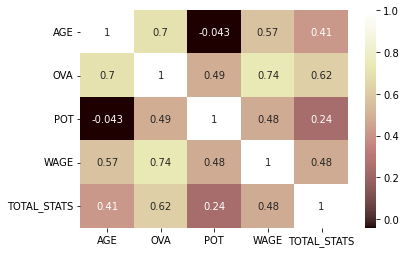

In [227]:
sns.heatmap(fifa_final.corr(), annot=True, cmap='pink')

**6. Plot a graph - First 10 player's Name Vs Player's POT**

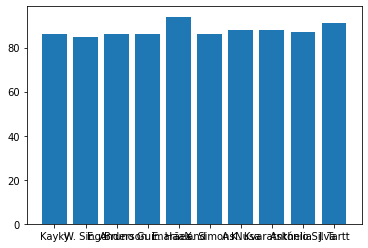

In [284]:
POTDATA = fifa_final.head(10)
x = POTDATA['NAME']
y = POTDATA['POT']
plt.bar(x,y)
plt.show()

**7. Plot a graph - First 10 player's Name Vs Player's Wage**

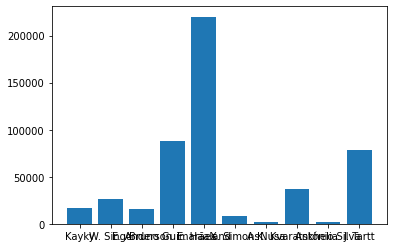

In [252]:
WAGEDATA = fifa_final.head(10)
x = WAGEDATA['NAME']
y = WAGEDATA['WAGE']
plt.bar(x,y)
plt.show()

**8. Find the Player(s) whose potential is more than 90**

In [262]:
fifa_final[fifa_final.POT>90]

,NAME,AGE,OVA,POT,TEAM,VALUE,WAGE,TOTAL_STATS
4,E. Haaland,21,88,94,Manchester City,€148M,220000,2120
9,J. Tartt,24,84,91,AFC Richmond,€85.5M,78000,2073
20,P. Foden,22,85,92,Manchester City,€109.5M,180000,2083
33,J. Bellingham,19,84,91,Borussia Dortmund,€81.5M,41000,2182
37,F. Wirtz,19,82,91,Bayer 04 Leverkusen,€66M,38000,1994
43,D. Vlahović,22,84,91,Juventus,€86.5M,140000,1912
57,Pedri,19,85,92,FC Barcelona,€104.5M,115000,2112
73,K. De Bruyne,31,91,91,Manchester City,€107.5M,350000,2303
103,L. Messi,35,91,91,Paris Saint-Germain,€54M,195000,2190
113,K. Havertz,23,84,91,Chelsea,€84.5M,130000,2042


**9. Find the Player(s) whose potential is more than 90 but the age < 20**

In [285]:
fifa_final[(fifa_final.POT>90) & (fifa_final.AGE<20)]

,NAME,AGE,OVA,POT,TEAM,VALUE,WAGE,TOTAL_STATS
33,J. Bellingham,19,84,91,Borussia Dortmund,€81.5M,41000,2182
37,F. Wirtz,19,82,91,Bayer 04 Leverkusen,€66M,38000,1994
57,Pedri,19,85,92,FC Barcelona,€104.5M,115000,2112
